In [1]:
import numpy as np
import pandas as pd

In [2]:
x = np.array([2, 1, 4, 3, 5])

# np.sort returns a copy of array sorted
np.sort(x)

array([1, 2, 3, 4, 5])

In [4]:
# calling sort on the array will sort in place
x.sort()
x

array([1, 2, 3, 4, 5])

In [5]:
# argsort returns the indices of the sorted elements
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4])

In [6]:
x[i]

array([1, 2, 3, 4, 5])

In [7]:
x

array([2, 1, 4, 3, 5])

In [8]:
# we can sort multi-dimensional arrays along a particular axis
rand = np.random.RandomState(42)
x = rand.randint(0, 10, (4, 6))
x

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [13]:
# the default sort axis is -1, the last axis
# in this case that is axis = 1
np.sort(x)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [14]:
np.sort(x, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [15]:
np.sort(x, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

#### Partial Sorting - Partitioning

Example application = fin the k smallest values in an array

This is useful when order is not important and we just want to separate into small/large subsets./

In [17]:
np.partition?

In [18]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [19]:
x = rand.randint(0, 10, (4, 6))
x

array([[8, 0, 9, 2, 6, 3],
       [8, 2, 4, 2, 6, 4],
       [8, 6, 1, 3, 8, 1],
       [9, 8, 9, 4, 1, 3]])

In [20]:
np.partition(x, 2, axis=1)

array([[0, 2, 3, 8, 6, 9],
       [2, 2, 4, 8, 6, 4],
       [1, 1, 3, 8, 8, 6],
       [1, 3, 4, 9, 9, 8]])

In [21]:
np.partition(x, 2)

array([[0, 2, 3, 8, 6, 9],
       [2, 2, 4, 8, 6, 4],
       [1, 1, 3, 8, 8, 6],
       [1, 3, 4, 9, 9, 8]])

In [22]:
np.partition(x, 2, axis=0)

array([[8, 0, 1, 2, 1, 1],
       [8, 2, 4, 2, 6, 3],
       [8, 6, 9, 3, 6, 3],
       [9, 8, 9, 4, 8, 4]])

In [23]:
# np.argpartition will return the indices
i = np.argpartition(x, 2, axis=0)
i

array([[0, 0, 2, 0, 3, 2],
       [1, 1, 1, 1, 1, 0],
       [2, 2, 0, 2, 0, 3],
       [3, 3, 3, 3, 2, 1]])

#### K-Nearest Neighbors Example

In [24]:
X = rand.rand(10, 2)

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set();

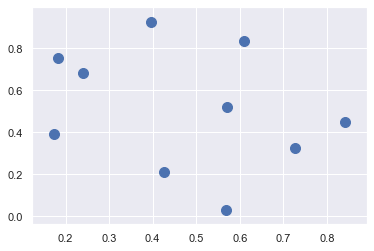

In [28]:
x = X[:, 0]
y = X[:, 1]
plt.scatter(x, y, s = 100)

In [30]:
# the squared distance between two points is
# the sum of the squared differences in each dimension

dist_sq = np.sum(X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2
dist_sq

1.9721522630525295e-31

In [32]:
X

array([[0.24102547, 0.68326352],
       [0.60999666, 0.83319491],
       [0.17336465, 0.39106061],
       [0.18223609, 0.75536141],
       [0.42515587, 0.20794166],
       [0.56770033, 0.03131329],
       [0.84228477, 0.44975413],
       [0.39515024, 0.92665887],
       [0.727272  , 0.32654077],
       [0.57044397, 0.52083426]])

In [33]:
X[:, np.newaxis, :]

array([[[0.24102547, 0.68326352]],

       [[0.60999666, 0.83319491]],

       [[0.17336465, 0.39106061]],

       [[0.18223609, 0.75536141]],

       [[0.42515587, 0.20794166]],

       [[0.56770033, 0.03131329]],

       [[0.84228477, 0.44975413]],

       [[0.39515024, 0.92665887]],

       [[0.727272  , 0.32654077]],

       [[0.57044397, 0.52083426]]])

In [34]:
X[np.newaxis, :, :]

array([[[0.24102547, 0.68326352],
        [0.60999666, 0.83319491],
        [0.17336465, 0.39106061],
        [0.18223609, 0.75536141],
        [0.42515587, 0.20794166],
        [0.56770033, 0.03131329],
        [0.84228477, 0.44975413],
        [0.39515024, 0.92665887],
        [0.727272  , 0.32654077],
        [0.57044397, 0.52083426]]])

In [31]:
# break it into components...
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [35]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [36]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [37]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
# if we now perform an arg sort along each row, the left most columns
# will provide indices of the nearest neighbors
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 7 2 9 1 4 8 6 5]
 [1 7 9 0 3 6 8 2 4 5]
 [2 0 4 3 9 5 8 7 1 6]
 [3 0 7 2 1 9 4 8 6 5]
 [4 5 2 8 9 6 0 3 1 7]
 [5 4 8 9 6 2 0 1 3 7]
 [6 8 9 1 4 5 0 7 2 3]
 [7 1 3 0 9 2 6 8 4 5]
 [8 6 9 4 5 1 2 0 7 3]
 [9 8 6 1 4 0 2 7 3 5]]


In [41]:
# the first column is 0 - 9
# this is due to each points closest point being itself
# we don't need to do a full sort because we are only interested in
# nearest neighbors, we can just do argpartition
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

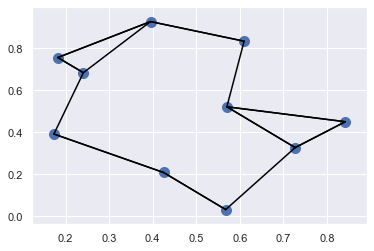

In [43]:
plt.scatter(X[:,0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')